In [ ]:
"""
    Based on https://arxiv.org/pdf/1705.06830.pdf
    https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/tf2_arbitrary_image_stylization.ipynb#scrollTo=dRc0vat3Alzo
    * Same model used on https://github.com/Cassini-chris/Free-Style-Transfer
"""
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import PIL.Image
from IPython.display import Image, display
import functools
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [10]:
# Using load functions from model's Colab
def crop_center(image):
  """Returns a cropped square image."""
  shape = image.shape
  new_shape = min(shape[1], shape[2])
  offset_y = max(shape[1] - shape[2], 0) // 2
  offset_x = max(shape[2] - shape[1], 0) // 2
  image = tf.image.crop_to_bounding_box(
      image, offset_y, offset_x, new_shape, new_shape)
  return image

@functools.lru_cache(maxsize=None)
def load_image(image_path, image_size=(256, 256), preserve_aspect_ratio=True):
  # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
  img = tf.io.decode_image(
      tf.io.read_file(image_path),
      channels=3, dtype=tf.float32)[tf.newaxis, ...]
  # img = crop_center(img)
  img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
  return img

def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

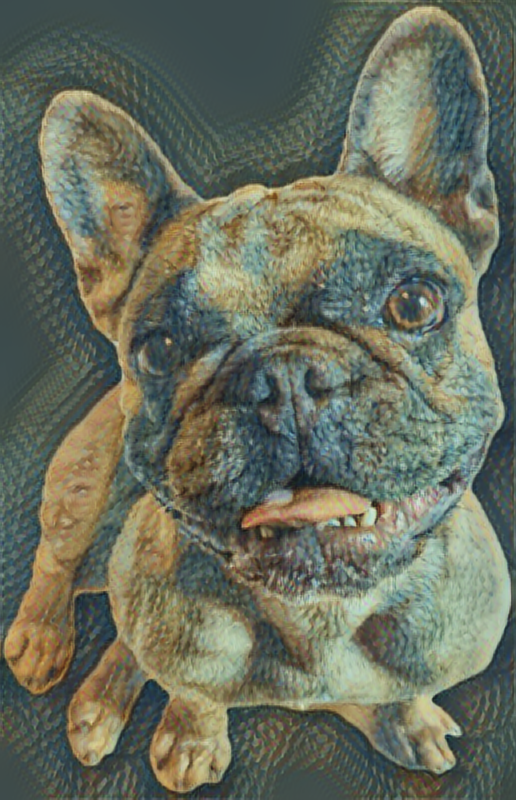

In [37]:
content_image  = load_image('../buzios_series_zero/bg_removed_resized/20210310_163355_processed_cropped_bg_fill_black.png', (800, 800))
custom_style   = load_image('../buzios_series_zero/styles/van_gogh.png')
custom_style   = tf.nn.avg_pool(custom_style, ksize=[3,3], strides=[1,1], padding='SAME')
stylized_image = hub_module(tf.constant(content_image), tf.constant(custom_style))[0]
output_image   = tensor_to_image(stylized_image)

output_image.save('final.png', 'PNG')
display(output_image)